In [5]:
# recorded by hao (2018/03/17)
# rock3.hao@gmail.com
# qinlab.BNU

# training of support vector machine

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

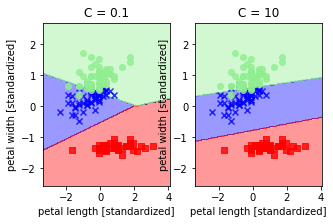

In [7]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split

iris = datasets.load_iris() # 由于Iris是很有名的数据集，scikit-learn已经原生自带了。
X = iris.data[:, [1, 2]]
y = iris.target # 标签已经转换成0，1，2了
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 为了看模型在没有见过数据集上的表现，随机拿出数据集中30%的部分做测试

# 为了追求机器学习和最优化算法的最佳性能，我们将特征缩放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # 估算每个特征的平均值和标准差
sc.mean_ # 查看特征的平均值，由于Iris我们只用了两个特征，所以结果是array([ 3.82857143,  1.22666667])
sc.scale_ # 查看特征的标准差，这个结果是array([ 1.79595918,  0.77769705])
X_train_std = sc.transform(X_train)
# 注意：这里我们要用同样的参数来标准化测试集，使得测试集和训练集之间有可比性
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 导入SVC
from sklearn.svm import SVC
svm1 = SVC(kernel='linear', C=0.1, random_state=0) # 用线性核
svm1.fit(X_train_std, y_train)

svm2 = SVC(kernel='linear', C=10, random_state=0) # 用线性核
svm2.fit(X_train_std, y_train)


fig = plt.figure(figsize=(5,3))
ax1 = fig.add_subplot(1,2,1)
#ax2 = fig.add_subplot(1,2,2)

plot_decision_regions(X_combined_std, y_combined, classifier=svm1)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('C = 0.1')


ax2 = fig.add_subplot(1,2,2)
plot_decision_regions(X_combined_std, y_combined, classifier=svm2)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('C = 10')

plt.show()

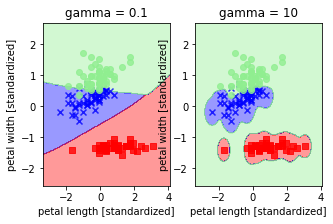

In [8]:

svm1 = SVC(kernel='rbf', random_state=0, gamma=0.1, C=1.0) # 令gamma参数中的x分别等于0.1和10
svm1.fit(X_train_std, y_train) 

svm2 = SVC(kernel='rbf', random_state=0, gamma=10, C=1.0) 
svm2.fit(X_train_std, y_train) 

fig = plt.figure(figsize=(5,3))
ax1 = fig.add_subplot(1,2,1)


plot_decision_regions(X_combined_std, y_combined, classifier=svm1)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('gamma = 0.1')


ax2 = fig.add_subplot(1,2,2)
plot_decision_regions(X_combined_std, y_combined, classifier=svm2)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('gamma = 10')

plt.show()